<a href="https://colab.research.google.com/github/denaboyinaswapna/-Basic-ML-/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CROP PRODUCTION IN INDIA

Objective: About crop production in india by using python and machine learning.

We build a project using machine learning by downloading dataset(i.e; crop_production.csv) from kaggle.

  IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas import Series,DataFrame
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import plotly.express as px

EXPLORATORY DATA ANALYSIS [EDA]

READ THA DATASET

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/crop_production.csv')

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00


In [ ]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
19994,Assam,KAMRUP,1999,Autumn,Rice,34903.00,41783.00
19995,Assam,KAMRUP,1999,Kharif,Arhar/Tur,447.00,358.00
19996,Assam,KAMRUP,1999,Kharif,Castor seed,204.00,61.00
19997,Assam,KAMRUP,1999,Kharif,Cotton(lint),102.00,48.00
19998,Assam,KAMRUP,1999,Kharif,Jute,4842.00,27435.00


In [ ]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
data.shape

(19999, 7)

In [ ]:
data.info

<bound method DataFrame.info of                         State_Name District_Name  ...     Area Production
0      Andaman and Nicobar Islands      NICOBARS  ...  1254.00    2000.00
1      Andaman and Nicobar Islands      NICOBARS  ...     2.00       1.00
2      Andaman and Nicobar Islands      NICOBARS  ...   102.00     321.00
3      Andaman and Nicobar Islands      NICOBARS  ...   176.00     641.00
4      Andaman and Nicobar Islands      NICOBARS  ...   720.00     165.00
...                            ...           ...  ...      ...        ...
19994                        Assam        KAMRUP  ... 34903.00   41783.00
19995                        Assam        KAMRUP  ...   447.00     358.00
19996                        Assam        KAMRUP  ...   204.00      61.00
19997                        Assam        KAMRUP  ...   102.00      48.00
19998                        Assam        KAMRUP  ...  4842.00   27435.00

[19999 rows x 7 columns]>

In [ ]:
data.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19994,False,False,False,False,False,False,False
19995,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False


In [ ]:
data.sum()

State_Name       Andaman and Nicobar IslandsAndaman and Nicobar...
District_Name    NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...
Crop_Year                                                 40119643
Season           Kharif     Kharif     Kharif     Whole Year Wh...
Crop             ArecanutOther Kharif pulsesRiceBananaCashewnut...
Area                                                  169134100.07
Production                                          18773817584.59
dtype: object

In [ ]:
data.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       73
dtype: int64

In [ ]:
for i in data.columns :
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 4
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam']
column name : District_Name
No. of column : 49
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP']
column name : Crop_Year
No. of column : 18
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014]
column name : Season
No. of column : 6
['Kharif     ' 'Whole Year ' 'Autumn

In [ ]:
data['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

In [ ]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00,0.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00,0.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,0.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,0.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00,0.00


In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data[data['Production'] !=0]

In [ ]:
data['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014])

In [ ]:
len(data['State_Name'].unique()) 

4

In [ ]:
data['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam'], dtype=object)

In [ ]:
data['District_Name'].nunique()

49

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data['Production'].sort_values(ascending = False) 

2543   780162000.00
2432   729965000.00
2488   720895000.00
2378   719961050.00
9829   718991000.00
           ...     
60             0.50
74             0.50
35             0.30
44             0.11
48             0.10
Name: Production, Length: 19822, dtype: float64

In [ ]:
no_of_diff_crops = data['Crop'].nunique()
types_of_crops = data['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)

There are 71 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal'
 'Citrus Fruit' 'Grapes' 'Mango' 'Orange' 'Other Fresh Fruits' 'Papaya'
 'Pome Fruit' 'Tomato' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Niger seed'
 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple']


# DATA VISULIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



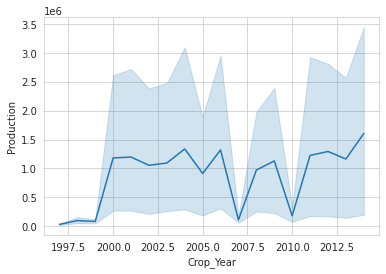

In [ ]:
sns.lineplot(data["Crop_Year"],data["Production"])

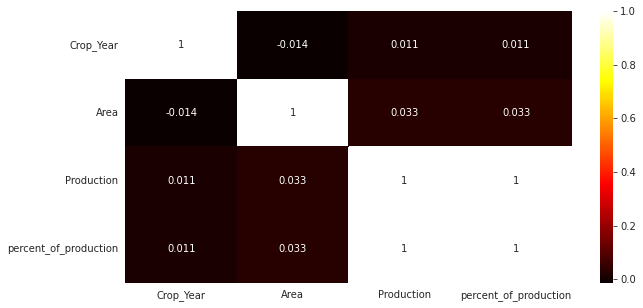

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='hot')

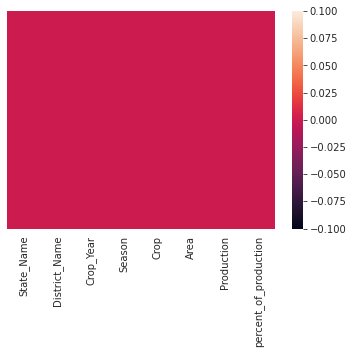

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

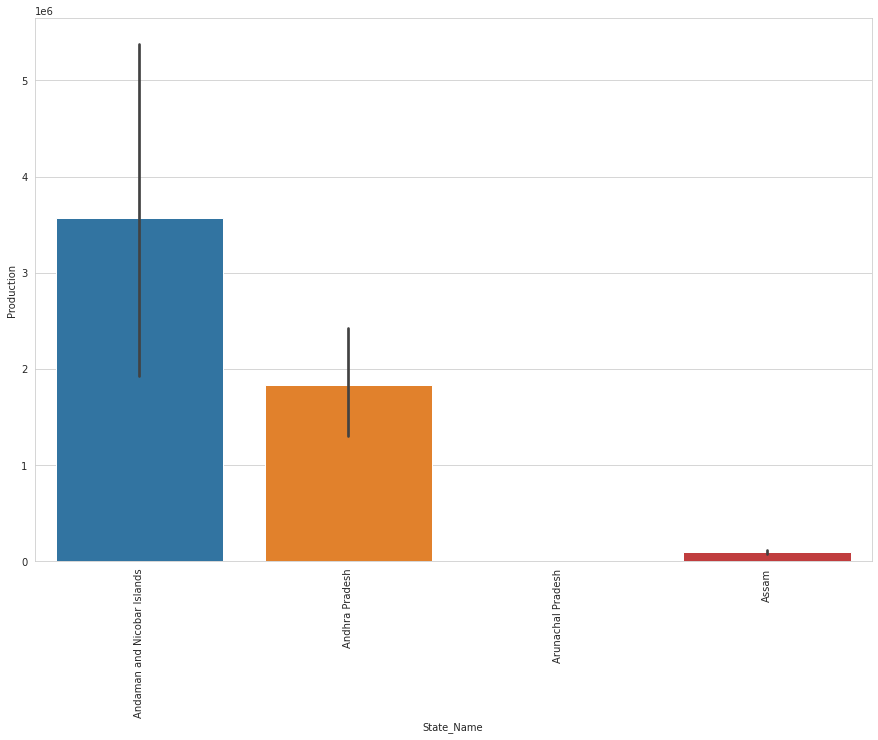

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



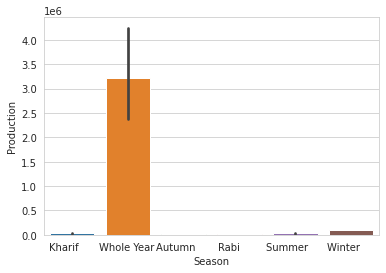

In [ ]:
sns.barplot(data["Season"],data["Production"])

In [ ]:
state_prod = data.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
px.bar(state_prod , 'State_Name', 'Production')


In [ ]:
dist_prod = data.groupby('District_Name')['Production'].sum().reset_index().sort_values(by='Production')
dist = dist_prod[0:5]
px.bar(dist , 'District_Name', 'Production')

In [ ]:
df = data
print(df)

                        State_Name  ... percent_of_production
0      Andaman and Nicobar Islands  ...                  0.00
1      Andaman and Nicobar Islands  ...                  0.00
2      Andaman and Nicobar Islands  ...                  0.00
3      Andaman and Nicobar Islands  ...                  0.00
4      Andaman and Nicobar Islands  ...                  0.00
...                            ...  ...                   ...
19994                        Assam  ...                  0.00
19995                        Assam  ...                  0.00
19996                        Assam  ...                  0.00
19997                        Assam  ...                  0.00
19998                        Assam  ...                  0.00

[19822 rows x 8 columns]


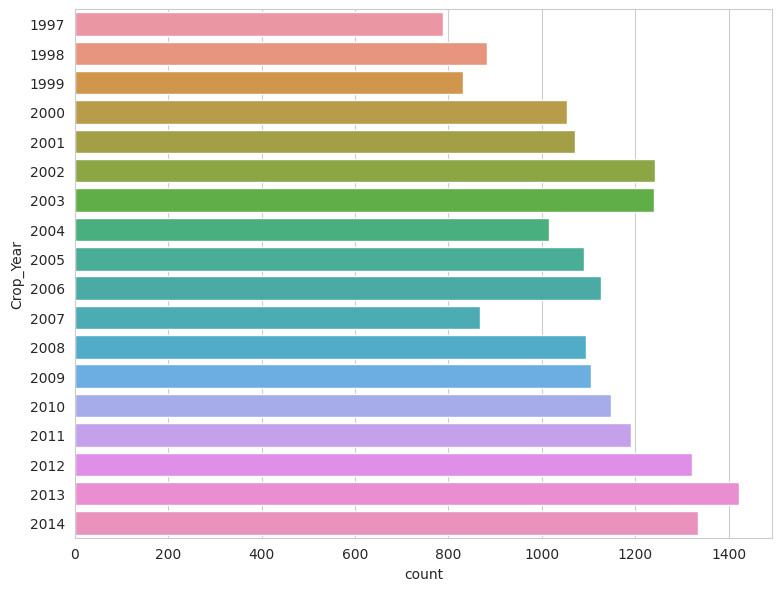

In [ ]:
plt.figure(figsize=(9,7),dpi=100)
sns.countplot(data=df,y='Crop_Year')

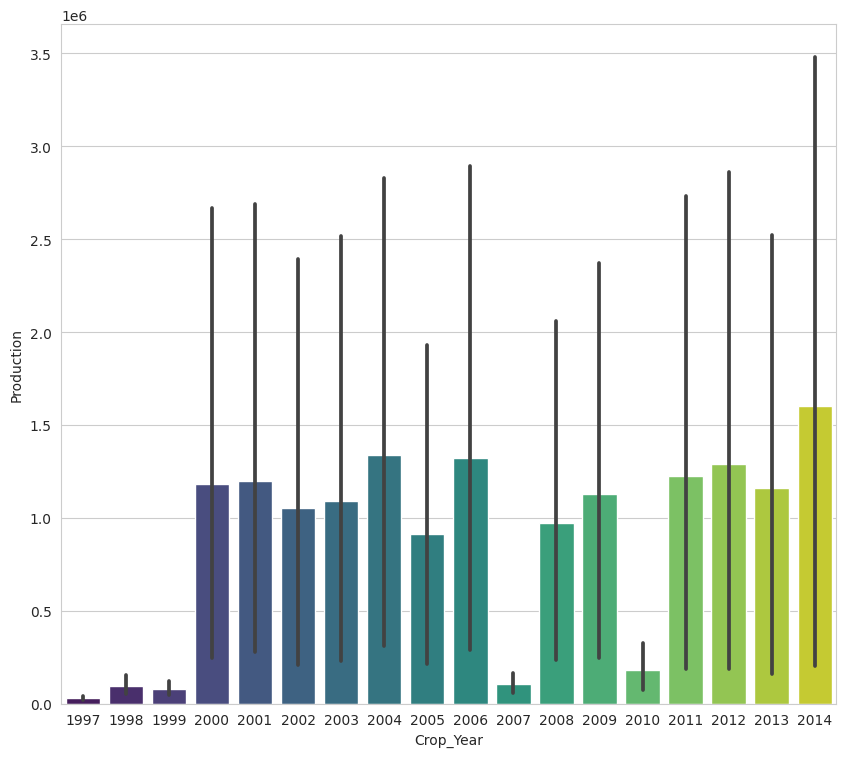

In [ ]:
plt.figure(figsize=(10,9),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production',palette='viridis')

In [ ]:
temp = data.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
temp = data.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')


In [ ]:
temp = data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

In [ ]:
temp = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')


Each type of crops required various area & various season. so, I'm going to pic top crop from this data

1.RICE

In [ ]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

In [ ]:
sns.barplot("Season","Production",data=rice_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



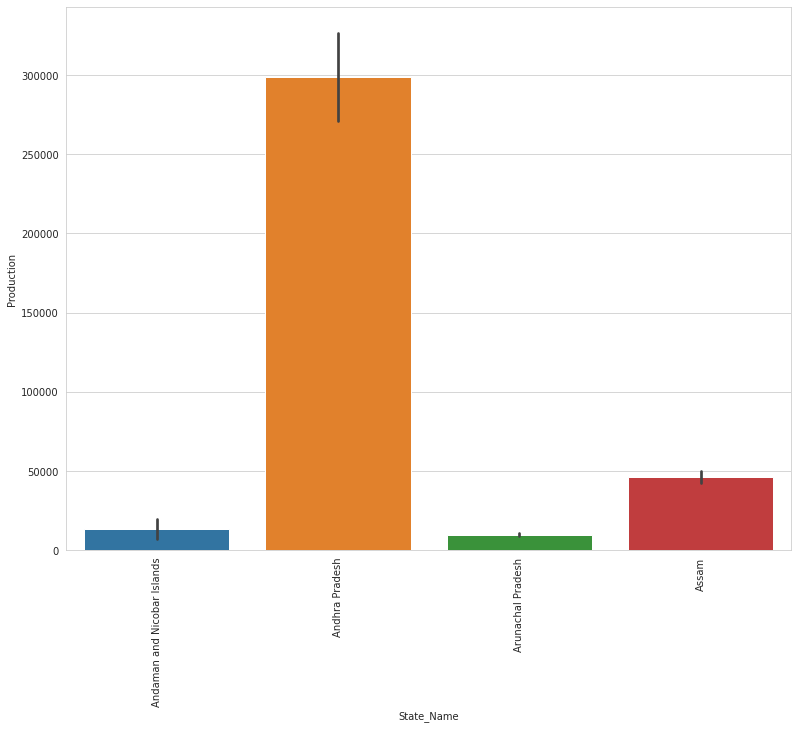

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
45,WEST GODAVARI,27845309.00,15.50
15,EAST GODAVARI,24690929.00,13.75
25,KRISHNA,20280606.00,11.29
20,GUNTUR,18245831.00,10.16
37,SPSR NELLORE,15252100.00,8.49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



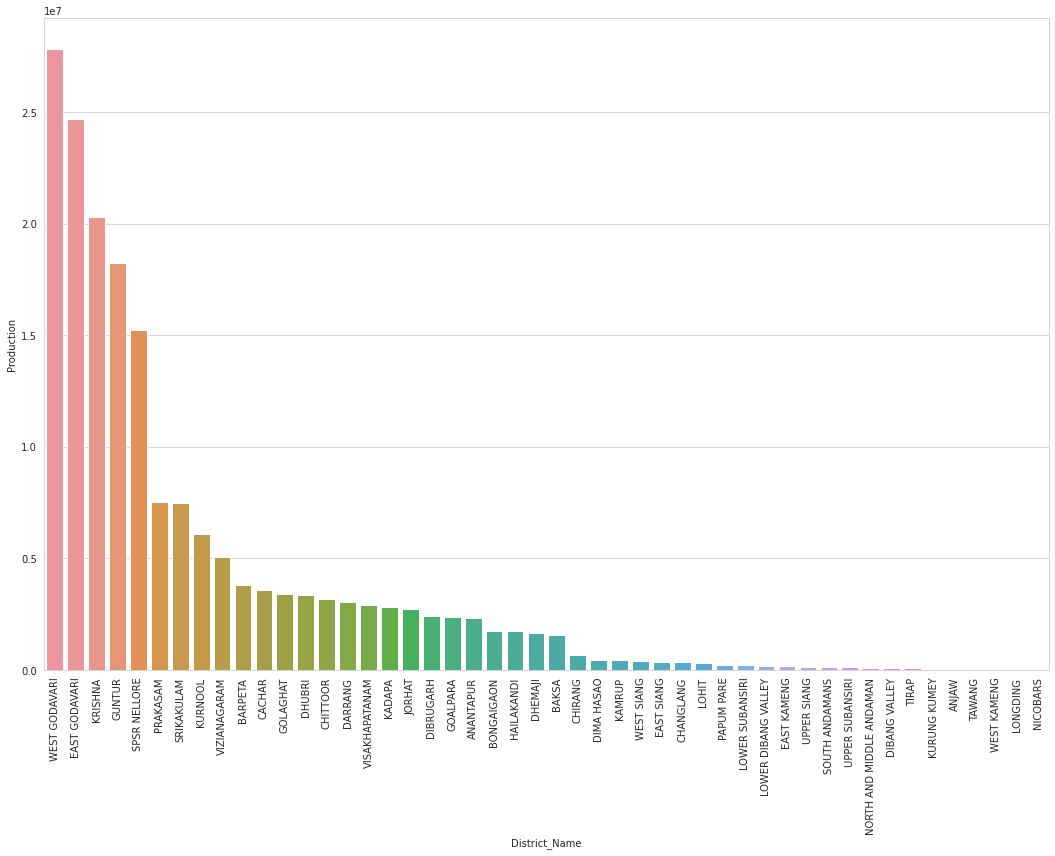

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



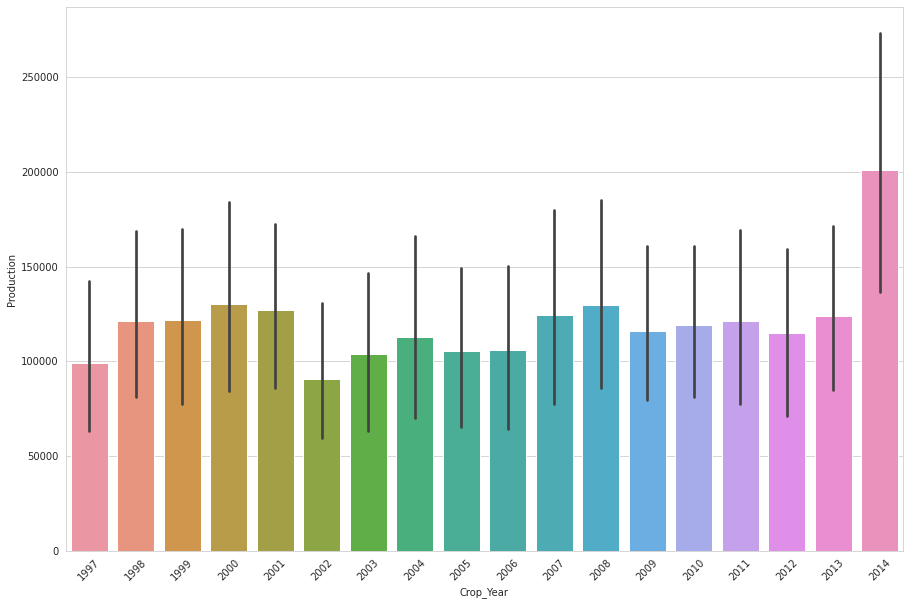

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



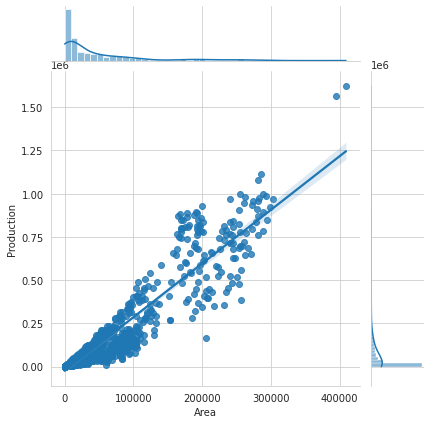

In [ ]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")

Insights:

From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

2. Coconut

In [ ]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(397, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00,0.35
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.00,0.34
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.00,0.36


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



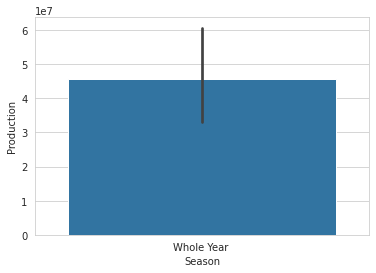

In [ ]:
sns.barplot("Season","Production",data=coc_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



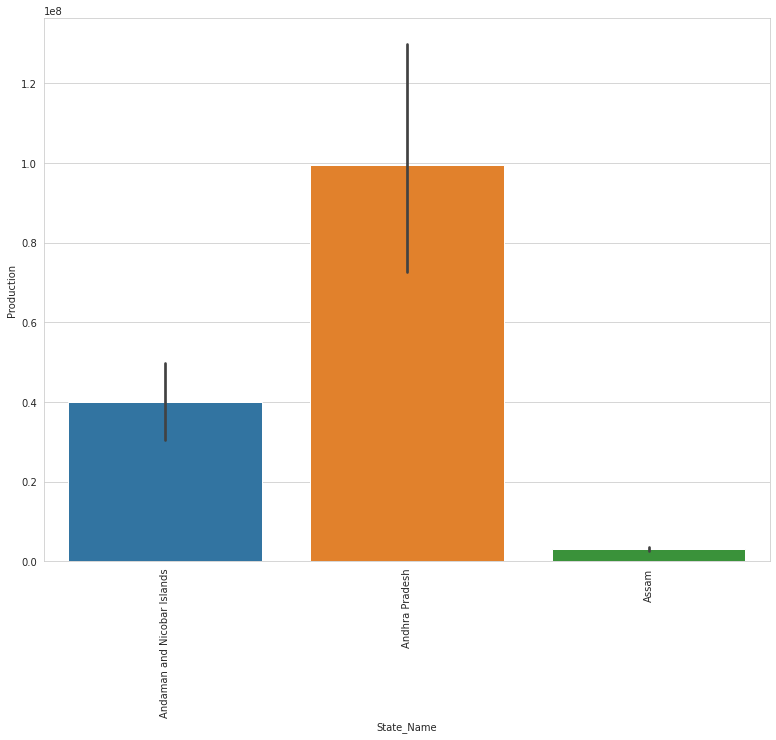

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
12,EAST GODAVARI,8214998064.00,45.19
30,WEST GODAVARI,4201576984.00,23.11
27,SRIKAKULAM,2120552756.00,11.67
28,VISAKHAPATANAM,966257946.00,5.32
22,NICOBARS,500680000.00,2.75


In [ ]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
12,EAST GODAVARI,8214998064.00,45.19
30,WEST GODAVARI,4201576984.00,23.11
27,SRIKAKULAM,2120552756.00,11.67
28,VISAKHAPATANAM,966257946.00,5.32
22,NICOBARS,500680000.00,2.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



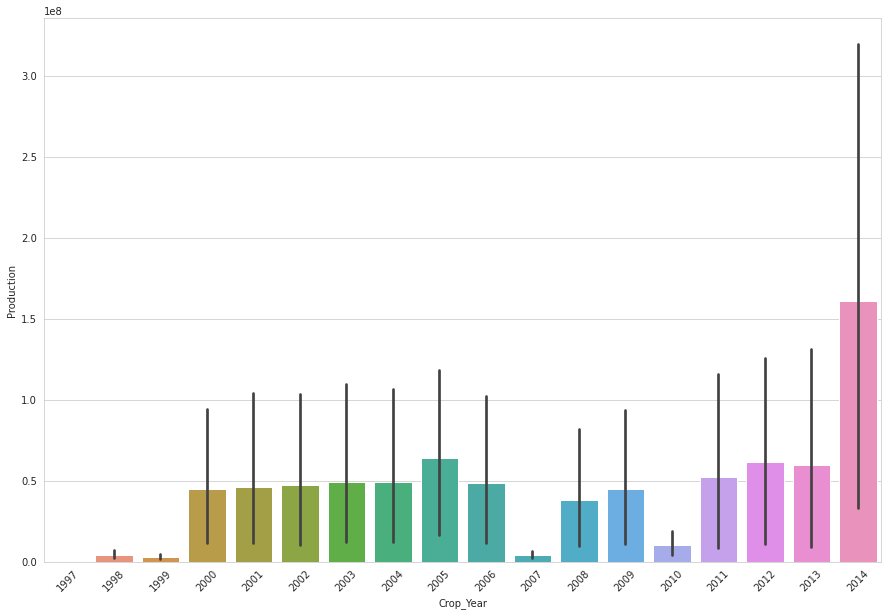

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



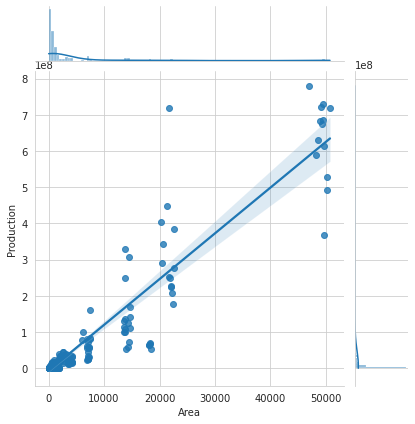

In [ ]:
sns.jointplot("Area","Production",data=coc_df,kind="reg")

Insight from Cocunut Production


.cocunut production is directly proportional to area
.its production is also gradually increasing over a time of period
.production is highin kerala state
.it does not depends on season

3. Sugarcane

In [ ]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(653, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,2.00,0.00
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.00,1.00,0.00
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.00,40.00,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



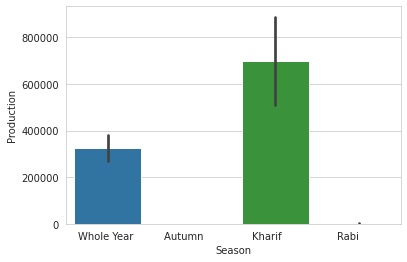

In [ ]:
sns.barplot("Season","Production",data=sug_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



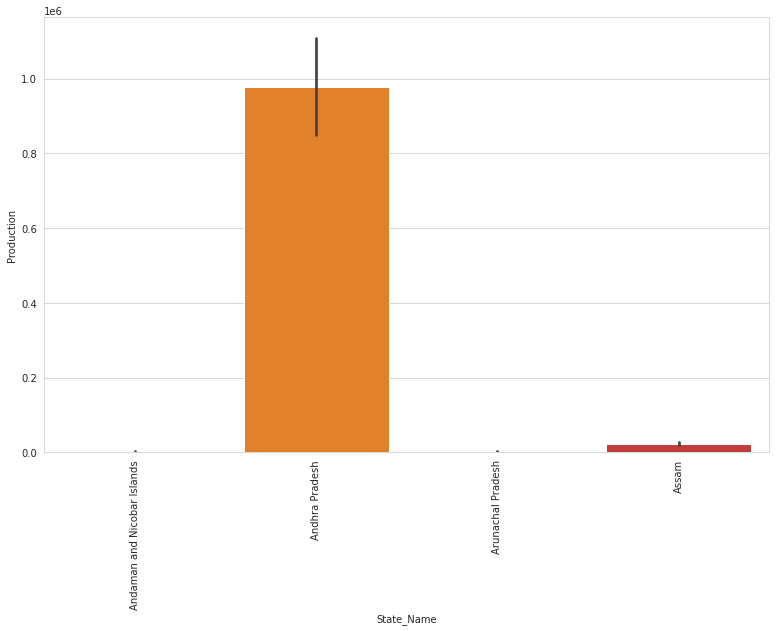

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
8,CHITTOOR,48539692.00,20.87
43,WEST GODAVARI,48076585.00,20.67
41,VISAKHAPATANAM,37783244.00,16.25
25,KRISHNA,27246685.00,11.72
15,EAST GODAVARI,22801584.00,9.80


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



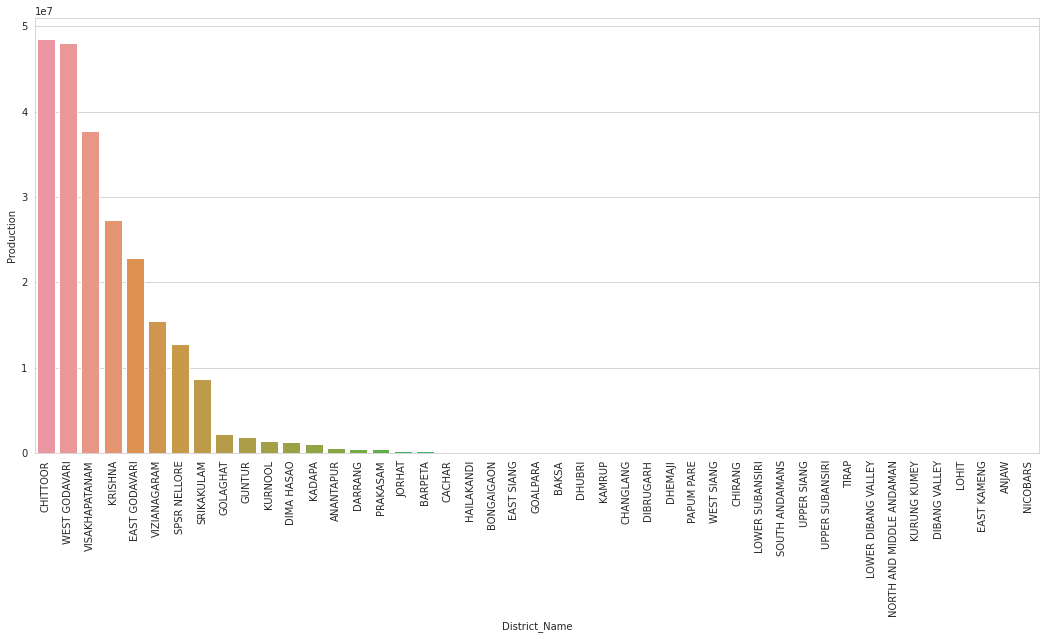

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot("District_Name","Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



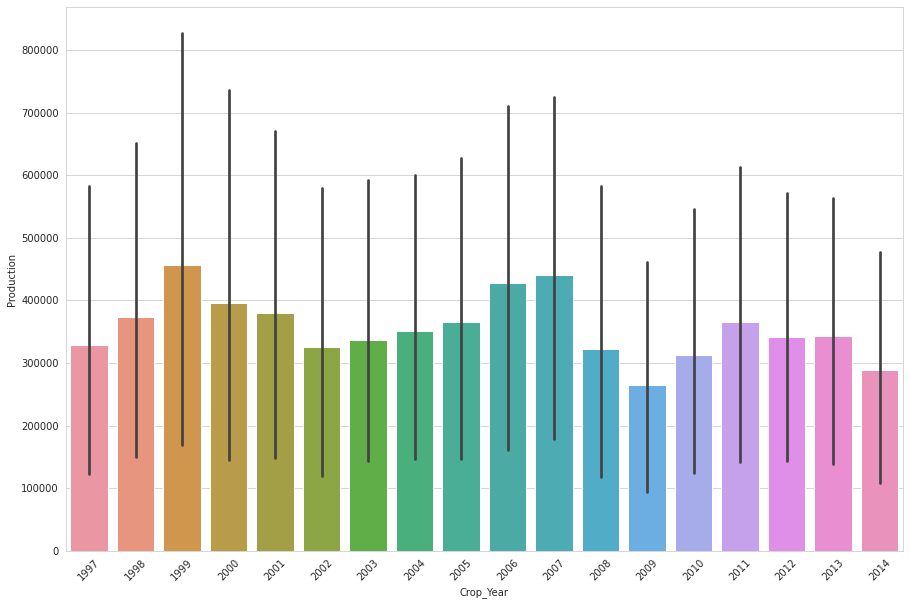

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



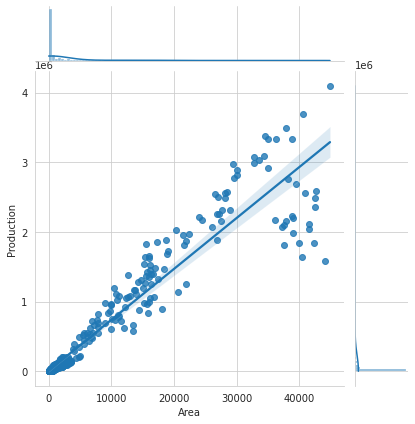

In [ ]:
sns.jointplot("Area","Production",data=sug_df,kind="reg")

Insighits:

.Sugarecane production is directly proportional to area
.And the production is high in some state only.

Feature Selection

In [ ]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [ ]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Black pepper,Crop_Blackgram,Crop_Brinjal,Crop_Cabbage,Crop_Cashewnut,Crop_Castor seed,Crop_Citrus Fruit,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Grapes,Crop_Groundnut,Crop_Horse-gram,Crop_Jowar,Crop_Jute,...,Crop_Mango,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Paddy,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pineapple,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Samai,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,1254.00,2000.00,0.00,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.00,1.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.00,321.00,0.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.00,641.00,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,720.00,165.00,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# CLEANING DATASET

In [ ]:
data.drop('Production',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head(50)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,0.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,0.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,0.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,0.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,0.00
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,0.35
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.00,0.00
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,0.00
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.00,0.00
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.00,0.00


In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,0.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,0.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,0.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,0.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,0.00


In [ ]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,percent_of_production
19994,Assam,KAMRUP,1999,Autumn,Rice,34903.00,0.00
19995,Assam,KAMRUP,1999,Kharif,Arhar/Tur,447.00,0.00
19996,Assam,KAMRUP,1999,Kharif,Castor seed,204.00,0.00
19997,Assam,KAMRUP,1999,Kharif,Cotton(lint),102.00,0.00
19998,Assam,KAMRUP,1999,Kharif,Jute,4842.00,0.00


In [ ]:
data.describe

<bound method NDFrame.describe of                         State_Name  ... percent_of_production
0      Andaman and Nicobar Islands  ...                  0.00
1      Andaman and Nicobar Islands  ...                  0.00
2      Andaman and Nicobar Islands  ...                  0.00
3      Andaman and Nicobar Islands  ...                  0.00
4      Andaman and Nicobar Islands  ...                  0.00
...                            ...  ...                   ...
19994                        Assam  ...                  0.00
19995                        Assam  ...                  0.00
19996                        Assam  ...                  0.00
19997                        Assam  ...                  0.00
19998                        Assam  ...                  0.00

[19822 rows x 7 columns]>

In [ ]:
data.isna()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,percent_of_production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19994,False,False,False,False,False,False,False
19995,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False


In [ ]:
data.isna().any()

State_Name               False
District_Name            False
Crop_Year                False
Season                   False
Crop                     False
Area                     False
percent_of_production    False
dtype: bool

In [ ]:
data.isna().any().sum()

0

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19994    False
19995    False
19996    False
19997    False
19998    False
Length: 19822, dtype: bool

# SPLITING THE DATA

In [ ]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (13280, 83)
x_test : (6542, 83)
y_train : (13280, 1)
y_test : (6542, 1)


In [ ]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Black pepper,Crop_Blackgram,Crop_Brinjal,Crop_Cabbage,Crop_Cashewnut,Crop_Castor seed,Crop_Citrus Fruit,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Grapes,Crop_Groundnut,Crop_Horse-gram,Crop_Jowar,Crop_Jute,Crop_Korra,...,Crop_Mango,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Paddy,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pineapple,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Samai,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
10326,828.00,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8246,5978.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14280,428.00,0.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2638,1115.00,0.00,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12138,958.00,0.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train[:5]

,Production
10326,894.00
8246,5207.00
14280,250.00
2638,442.00
12138,1008.00


In [ ]:
x_test

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Black pepper,Crop_Blackgram,Crop_Brinjal,Crop_Cabbage,Crop_Cashewnut,Crop_Castor seed,Crop_Citrus Fruit,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Grapes,Crop_Groundnut,Crop_Horse-gram,Crop_Jowar,Crop_Jute,Crop_Korra,...,Crop_Mango,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Paddy,Crop_Papaya,Crop_Peas & beans (Pulses),Crop_Pineapple,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Samai,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
2273,691.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4891,86.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10896,10390.00,0.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7075,170.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17275,315.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,688.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7234,1685.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15436,179.00,0.00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6558,3576.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

,Production
2273,123.00
4891,650.00
10896,12850.00
7075,77.00
17275,4803.00
...,...
2373,149.00
7234,494.00
15436,79.00
6558,9537.00


# MACHINE LEARNING MODELS

MODELS INCLUDING FITTING,PREDICTING AND ACCURACY

Model -1: Random Forest

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('Training split input-',x_train.shape)
print('Traning split input-',x_test.shape)

Training split input- (15857, 83)
Traning split input- (3965, 83)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
print('RandomForestRegressor created')

RandomForestRegressor created


In [ ]:
preds

array([2.01568000e+03, 1.00000000e+00, 3.26840000e+02, ...,
       6.86200000e+01, 4.12208333e+01, 2.74355000e+04])

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RANDOM FOREST REGRESSOR CREATED

FITTING,PREDICTION AND ACCURACY



In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.65

Model -2 : Linear Regression

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('Training split input-',x_train.shape)
print('Traning split input-',x_test.shape)

Training split input- (160, 8)
Traning split input- (40, 8)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

1.0

MODEL-3: K-NEAREST NEIGHBOURS

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
x,y=make_classification(n_samples=200 ,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(x_train)
x_train= sc.transform(x_train)
sc.fit(x_test)
x_test= sc.transform(x_test)
x.shape

(200, 8)

Text(0, 0.5, 'Error')

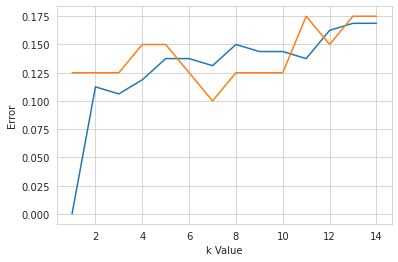

In [ ]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')

In [ ]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8

# SUMMARY

The dataset CROP PRODUCTION IN INDIA is downloaded from kaggle. This dataset provides a huge amount of information on crop production in India ranging from several years. Based on the Information the ultimate goal would be to predict crop production using powerful machine learning techniques.


EXPLORATORY DATA ANALYSIS [EDA]::Exploratory Data Analysis is one of the most important and useful aspects of Machine Learning Operations. EDA is mostly used by Data Scientists to figure out the data and to get some insights from the data available.EDA basically helps you to analyze and visualize the data and get some necessary and useful insights from the data.



DATA CLEANING Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.

SPLIT YOUR DATA WITH 80-20%% The most common split ratio is 80:20. That is 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set. Before splitting the data, make sure that the dataset is large enough. Train/Test split works well with large datasets.The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

# **MACHINE LEARNING MODELS**

*Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values.After model building, we are going to apply the model to make predictions followed by model performance evaluation and data visualization of its results.

Here we use 3 machine learning models 
i.e;{1.Random Forest Regression;
     2.Linear Regression;
     3.K-Nearest Neighbours.

Random Forest Regression: Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting. The accuracy of the random forest regression is 60% in this project.

K-Nearest Neighbours:K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase.K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.We got 80% accuracy in this project.

Linear Regression:linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but has been borrowed by machine learning. It is both a statistical algorithm and a machine learning algorithm. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.We got 100% accuracy in this project.